In [63]:
import pandas as pd
control = pd.read_csv('control_data.csv')
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [64]:
experiment = pd.read_csv('experiment_data.csv')
experiment.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [65]:
control.shape,experiment.shape

((37, 5), (37, 5))

We have 5 columns consisting of:

Date: a character formatted Day, Month, and Day of Month
Pageviews: An aggregated count of Page Views on the given day
Clicks: An aggregated count of Page Clicks on the given day for the page in question
Enrollments: An aggregated count of Enrollments by day.
Payments: An aggregated count of Payments by day.

In [66]:
control.isnull().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [67]:
experiment.isnull().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

The count of missing data is consistent

In [68]:
control[control['Enrollments'].isnull()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9437,788,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
30,"Mon, Nov 10",10419,874,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN
32,"Wed, Nov 12",10134,801,NaN,NaN


In [69]:
experiment[experiment['Enrollments'].isnull()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9359,789,NaN,NaN
24,"Tue, Nov 4",9427,743,NaN,NaN
25,"Wed, Nov 5",9633,808,NaN,NaN
26,"Thu, Nov 6",9842,831,NaN,NaN
27,"Fri, Nov 7",9272,767,NaN,NaN
28,"Sat, Nov 8",8969,760,NaN,NaN
29,"Sun, Nov 9",9697,850,NaN,NaN
30,"Mon, Nov 10",10445,851,NaN,NaN
31,"Tue, Nov 11",9931,831,NaN,NaN
32,"Wed, Nov 12",10042,802,NaN,NaN


We don’t have Enrollment information from November 3rd on. We will need to remove these observations.

In [70]:
control.dropna(axis=0,inplace=True)
experiment.dropna(axis=0,inplace=True)

In [71]:
control.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         23 non-null     object 
 1   Pageviews    23 non-null     int64  
 2   Clicks       23 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ KB


In [72]:
experiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         23 non-null     object 
 1   Pageviews    23 non-null     int64  
 2   Clicks       23 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ KB


Date is in character format. It doesn’t contain year information. Since the experiment was only run for 37 days, we can only realistically use the “Day of Week” as a predictor.

The other columns are all numeric, which is OK. We will predict the number of Enrollments (regression)

Combine the control_tbl and experiment_tbl, adding an “id” column indicating if the data was part of the experiment or not

Add a “row_id” column to help for tracking which rows are selected for training and testing in the modeling section

Create a “Day of Week” feature from the “Date” column

Drop the unnecessary “Date” column and the “Payments” column

Handle the missing data (NA) by removing these rows.

Shuffle the rows to mix the data up for learning

Reorganize the columns

In [73]:
control['experiment'] = 0
experiment['experiment'] =1

In [74]:
control['Date'] = control['Date'].str.split(',')
experiment['Date'] = experiment['Date'].str.split(',')

In [75]:
#function to separate days of week
def day_of_week(col):
    return col[0]
control['DOW'] = control['Date'].apply(day_of_week)
experiment['DOW'] = experiment['Date'].apply(day_of_week)

In [76]:
control.DOW.value_counts()

Sat    4
Sun    4
Wed    3
Fri    3
Tue    3
Mon    3
Thu    3
Name: DOW, dtype: int64

In [77]:
experiment['DOW'].value_counts()

Sat    4
Sun    4
Wed    3
Fri    3
Tue    3
Mon    3
Thu    3
Name: DOW, dtype: int64

In [78]:
control.drop('Date',axis=1,inplace=True)
experiment.drop('Date',axis=1,inplace=True)


In [79]:
control.shape,experiment.shape

((23, 6), (23, 6))

In [80]:
data_formatted = pd.concat([control,experiment],axis=0)
data_formatted.head(3)

,Pageviews,Clicks,Enrollments,Payments,experiment,DOW
0,7723,687,134.0,70.0,0,Sat
1,9102,779,147.0,70.0,0,Sun
2,10511,909,167.0,95.0,0,Mon


In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_formatted['DOW'] = le.fit_transform(data_formatted['DOW'])
data_formatted.head(3)

,Pageviews,Clicks,Enrollments,Payments,experiment,DOW
0,7723,687,134.0,70.0,0,2
1,9102,779,147.0,70.0,0,3
2,10511,909,167.0,95.0,0,1


In [82]:
data_formatted.DOW.value_counts()

3    8
2    8
6    6
5    6
4    6
1    6
0    6
Name: DOW, dtype: int64

In [83]:
data_formatted.drop('Payments',axis=1,inplace=True)

In [84]:
X = data_formatted.drop('Enrollments',axis=1)
y = data_formatted['Enrollments']

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, shuffle=True,random_state=42)

In [86]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((36, 4), (36,), (10, 4), (10,))

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [88]:
from sklearn import metrics
import numpy as np
metrics.mean_absolute_error(y_test,y_pred_lr), np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)),metrics.r2_score(y_test,y_pred_lr)

(19.265105511243338, 25.94918409770782, 0.2113004177558887)

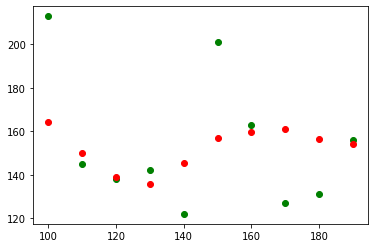

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(np.arange(100,200,10),y_test,color='g')
plt.scatter(np.arange(100,200,10),y_pred_lr,color='r')
plt.show()

After formatting and plotting the data, we can see that the model had an issue with Observation 1 and 6, which is likely the reason for the low R-squared value (test set).

In [90]:
#using statsmodels 
import statsmodels.api as sm
X_train_mod = sm.add_constant(X_train)
model_lr = sm.OLS(y_train,X_train_mod).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Enrollments   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     11.24
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           9.45e-06
Time:                        23:54:48   Log-Likelihood:                -160.39
No. Observations:                  36   AIC:                             330.8
Df Residuals:                      31   BIC:                             338.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.1888     43.975      1.323      0.195     -31.498     147.876
Pageviews      0.0564      0.010      5.816      0.000       0.037       0.076
Clicks        -0.5396      0.114     -4.733      0.000      -0.772      -0.307
experiment   -19.9677      7.542     -2.648      0.013     -35.349      -4.587
DOW           -1.8326      2.059     -0.890      0.380      -6.033       2.368
==============================================================================
Omnibus:                        4.689   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                3.985
Skew:                           0.815   Prob(JB):                        0.136
Kurtosis:                       2.993   Cond. No.                     1.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can arrange by “p.value” to get an idea of how important the model terms are. Clicks, Pageviews, and Experiment are judged strong predictors with a p-value less than 0.05. However, we want to try out other modeling techniques to judge this. We note that the coefficient of Experiment is -19.96, and because the term is binary (0 or 1) this can be interpreted as decreasing Enrollments by -19.96 per day when the Experiment is run.

In [91]:
#  we build a decision tree 
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 5,
                          min_samples_leaf=4
                          )

In [93]:
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
metrics.mean_absolute_error(y_test,y_pred_dt), np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt))

(22.21809523809524, 31.659408477176523)

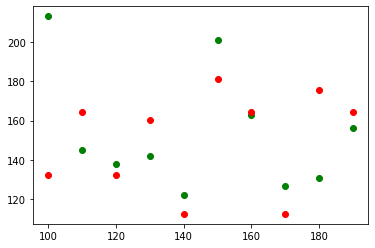

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(np.arange(100,200,10),y_test,color='g')
plt.scatter(np.arange(100,200,10),y_pred_dt,color='r')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


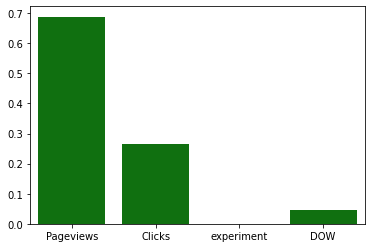

In [96]:
sns.barplot(X.columns,dt.feature_importances_,color='g')
plt.show()

There are several key benefits to performing A/B Testing using Machine Learning. These include:

Understanding the Complex System - We discovered that the system is driven by Pageviews and Clicks. Statistical Inference would not have identified these drivers. Machine Learning did.

Providing a direction and magnitude of the experiment - We saw that Experiment = 1 drops enrollments by -19.96 Enrollments Per Day in the Linear Regression. We saw similar drops in the Decision Tree rules. Statistical inference would not have identified magnitude and direction. Only whether or not the Experiment had an effect.

What Should Udacity Do?

If Udacity wants to maximimize enrollments, it should focus on increasing Page Views from qualified candidates. Page Views is the most important feature in 2 of 3 models.

If Udacity wants alert people of the time commitment, the additional popup form is expected to decrease the number of enrollments. The negative impact can be seen  in the linear regression model term (-17.96 Enrollments when Experiment = 1). Is this OK? It depends on what Udacity’s goals are.

But this is where the business and marketing teams can provide their input developing strategies to maximize their goals - More users, more revenue, and/or more course completions.
